In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # train test split
# df = pd.read_csv('data_final.csv')
# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df, test_size=0.15, random_state=42)
# df_train, df_test = pd.DataFrame(df_train, columns=df.columns), pd.DataFrame(df_test, columns=df.columns)
# df_train.to_csv('train.csv')
# df_test.to_csv('test.csv')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1995 non-null   int64  
 1   brand             1995 non-null   int64  
 2   3G                1995 non-null   bool   
 3   4G                1995 non-null   bool   
 4   5G                1995 non-null   bool   
 5   Announced         1995 non-null   int64  
 6   Weight            1995 non-null   float64
 7   Length            1995 non-null   float64
 8   Width             1995 non-null   float64
 9   Diameter          1995 non-null   float64
 10  Display Type      1995 non-null   int64  
 11  Display Size      1995 non-null   float64
 12  ppi               1995 non-null   float64
 13  body ratio        1995 non-null   float64
 14  OS                1995 non-null   int64  
 15  battery_capacity  1995 non-null   float64
 16  Price             1995 non-null   float64


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        353 non-null    int64  
 1   brand             353 non-null    int64  
 2   3G                353 non-null    bool   
 3   4G                353 non-null    bool   
 4   5G                353 non-null    bool   
 5   Announced         353 non-null    int64  
 6   Weight            353 non-null    float64
 7   Length            353 non-null    float64
 8   Width             353 non-null    float64
 9   Diameter          353 non-null    float64
 10  Display Type      353 non-null    int64  
 11  Display Size      353 non-null    float64
 12  ppi               353 non-null    float64
 13  body ratio        353 non-null    float64
 14  OS                353 non-null    int64  
 15  battery_capacity  353 non-null    float64
 16  Price             353 non-null    float64
 1

In [6]:
X = train.drop(['OS', 'Unnamed: 0'], axis=1)
y = train['OS']

y.value_counts()

OS
0    1853
1      78
2      64
Name: count, dtype: int64

In [7]:
#re sample or not to re sample




In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
Xt, yt = sampler.fit_resample(X_train, y_train)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model = RandomForestClassifier(random_state=42)
model.fit(Xt, yt)
y_pred = model.predict(X_val)
f1_score(y_val, y_pred, average='weighted')


0.9673551846318431

In [10]:
X_test = test.drop(['OS', 'Unnamed: 0'], axis=1)

y_test = test['OS']

y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')
# to good to be true?
# ok that was the power of the unnamed:)
# or could we have better results?

0.9695136496269642

In [11]:
y_pred = np.zeros(len(y_test))
f1_score(y_test, y_pred, average='weighted')
# the worst we should get is this. let's keep it like this

0.9200077522256723

In [12]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             4173 non-null   int64  
 1   3G                4173 non-null   bool   
 2   4G                4173 non-null   bool   
 3   5G                4173 non-null   bool   
 4   Announced         4173 non-null   int64  
 5   Weight            4173 non-null   float64
 6   Length            4173 non-null   float64
 7   Width             4173 non-null   float64
 8   Diameter          4173 non-null   float64
 9   Display Type      4173 non-null   int64  
 10  Display Size      4173 non-null   float64
 11  ppi               4173 non-null   float64
 12  body ratio        4173 non-null   float64
 13  battery_capacity  4173 non-null   float64
 14  Price             4173 non-null   float64
 15  CPU               4173 non-null   float64
 16  pixel             4173 non-null   float64


In [13]:
train

,Unnamed: 0,brand,3G,4G,5G,Announced,Weight,Length,Width,Diameter,...,3.5mm jack,Chipset,RAM,Storage,Micro-SIM,Mini-SIM,Nano-SIM,eSIM,ratio_1,ratio_2
0,1547,13,True,True,False,2017,180.0,165.1,83.8,9.4,...,True,6,2.0,16.0,False,False,True,False,16.0,9.0
1,1313,9,True,False,False,2011,125.5,119.0,62.4,12.5,...,True,6,0.5,8.0,True,False,False,False,5.0,3.0
2,929,7,True,True,False,2015,150.0,152.6,76.2,8.0,...,True,4,2.0,16.0,True,False,False,False,16.0,9.0
3,1723,12,True,True,True,2021,207.0,163.7,76.2,8.3,...,True,4,6.0,128.0,False,False,True,False,20.0,9.0
4,1925,10,True,True,True,2023,202.0,158.2,76.7,8.2,...,False,1,4.0,128.0,False,False,False,True,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1638,12,True,True,True,2023,198.0,160.5,74.3,8.1,...,False,4,8.0,256.0,False,False,True,False,20.0,9.0
1991,1095,8,True,True,False,2015,155.0,148.9,76.1,3.5,...,True,6,3.0,32.0,True,False,False,False,16.0,9.0
1992,1130,8,True,False,False,2014,126.6,127.2,66.8,9.5,...,True,6,1.0,4.0,False,True,False,False,5.0,3.0
1993,1294,9,True,True,False,2013,159.0,133.3,72.3,9.2,...,True,6,0.5,8.0,True,False,False,False,5.0,3.0


### the capacity thing


In [14]:
def transform_battery_capacity_train(x):
    if x < train['battery_capacity'].quantile(0.33):
        return 0
    elif x < train['battery_capacity'].quantile(0.67):
        return 1
    return 2

In [15]:
X = train.drop(['OS', 'Unnamed: 0'], axis=1)

    
X['battery_capacity'] = X['battery_capacity'].apply(transform_battery_capacity_train)

y = train['OS']


In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
Xt, yt = sampler.fit_resample(X_train, y_train)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score

model = RandomForestClassifier(random_state=42)
# selector = SelectKBest(f_classif, k=2)
# Xt_selected = selector.fit_transform(Xt, yt)
# X_val_selected = selector.transform(X_val)

model.fit(Xt, yt)

y_pred = model.predict(X_val)
f1_score(y_val, y_pred, average='weighted')

0.9724294607751036

In [18]:
def transform_battery_capacity_test(x):
    if x < test['battery_capacity'].quantile(0.33):
        return 0
    elif x < test['battery_capacity'].quantile(0.67):
        return 1
    return 2

In [19]:
X_test = test.drop(['OS', 'Unnamed: 0'], axis=1)
X_test['battery_capacity'] = X_test['battery_capacity'].apply(transform_battery_capacity_test)

y_test = test['OS']

y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9673372797869594

In [20]:
y_pred[y_test == 1], y_test[y_pred == 1]

(array([1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0], dtype=int64),
 84     1
 100    1
 101    0
 110    0
 114    1
 118    0
 161    0
 175    0
 182    1
 199    1
 215    1
 313    1
 334    0
 345    0
 Name: OS, dtype: int64)

Text(50.722222222222214, 0.5, 'True Lables')

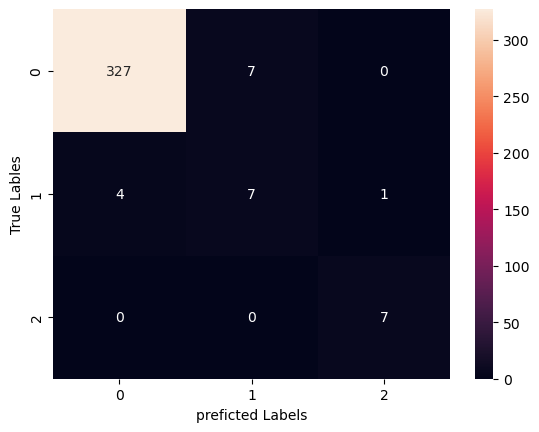

In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("predicted Labels")
plt.ylabel("True Labels")